# Python capstone project

# TMDB Movie Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statistics as st

# Task-1 : First 50 movies with the genres

In [2]:
df = pd.read_csv("DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv")
df.shape

(4803, 20)

In [3]:
# function for extracting genre names from the json data

def fun(df):
    genres = json.loads(df)
    return [g['name'] for g in genres]
df['genres_list'] = df['genres'].apply(fun)

In [4]:
First_50_movies = df[['title','genres_list']].head(50)
First_50_movies

,title,genres_list
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Fantasy, Action, Adventure]"
6,Tangled,"[Animation, Family]"
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"


# Task-2 : Missing value Treatment

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
genres_list                0
dtype: int64

In [6]:
# for categorical columns
df['tagline'] = df['tagline'].fillna("Not found")
df['homepage'] = df['homepage'].fillna("Not found")
df['overview'] = df['overview'].fillna("Not found")

# for numerical columns
df['release_date'] = df['release_date'].fillna(0)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())


In [7]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
genres_list             0
dtype: int64

# Task-3 : Movie categories which have the highest budget

In [8]:
movie_cat_budget = df[df['budget']>220000][["budget","genres_list"]]
movie_cat_budget


,budget,genres_list
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[Adventure, Fantasy, Action]"
2,245000000,"[Action, Adventure, Crime]"
3,250000000,"[Action, Crime, Drama, Thriller]"
4,260000000,"[Action, Adventure, Science Fiction]"
...,...,...
4680,450000,"[Crime, Horror, Thriller]"
4682,13000000,[Horror]
4720,8500000,[Drama]
4758,4000000,"[Thriller, Science Fiction]"


# Task-4: Movie categories which have the highest revenue

In [9]:
movie_cat_revenue = df[df['revenue']>961000000][['genres_list','revenue']]
movie_cat_revenue

,genres_list,revenue
0,"[Action, Adventure, Fantasy, Science Fiction]",2787965087
3,"[Action, Crime, Drama, Thriller]",1084939099
7,"[Action, Adventure, Science Fiction]",1405403694
12,"[Adventure, Fantasy, Action]",1065659812
16,"[Science Fiction, Action, Adventure]",1519557910
17,"[Adventure, Action, Fantasy]",1045713802
25,"[Drama, Romance, Thriller]",1845034188
26,"[Adventure, Action, Science Fiction]",1153304495
28,"[Action, Adventure, Science Fiction, Thriller]",1513528810
29,"[Action, Adventure, Thriller]",1108561013


In [10]:
# [Action, Adventure, Fantasy, Science Fiction] genres have the highest revenue

# Task-5 : Removing the rows that contain 0 in budget and revenue

In [11]:

zero_budget = df.loc[df['budget'] == 0].index
# Drop the row
df.drop(zero_budget, inplace=True)

zero_rev = df.loc[df['budget'] == 0].index
# Drop the row
df.drop(zero_rev, inplace=True)


# Task-6 : Top 10 movies with highest revenues and Top 10 movies with least budget

In [12]:
Top_10_highest_rev  = df.sort_values(by='revenue',ascending=False).head(10)
Top_10_highest_rev[["title","revenue"]] 

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


In [13]:
Top_10_least_budget = df.sort_values(by='budget').head(10)
Top_10_least_budget[["title","budget"]]

,title,budget
4247,Me You and Five Bucks,1
4251,Fetching Cody,1
4238,Modern Times,1
4293,The Algerian,1
4369,Slam,1
4424,Fear Clinic,1
4262,Incident at Loch Ness,1
4140,"To Be Frank, Sinatra at 100",2
3967,Four Single Fathers,3
3687,Without Men,4


# Task-7 : Relationship between budget and popularity

C:\Users\Sethunarayanan\AppData\Local\Temp\ipykernel_13976\4166045883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df.corr()


<Axes: >

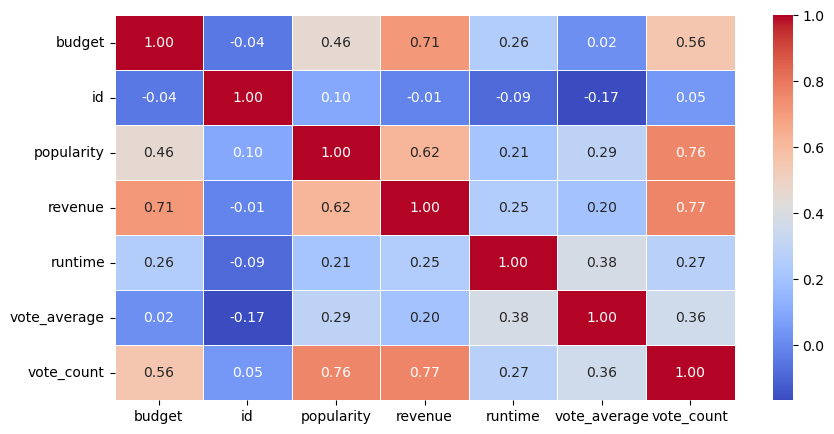

In [14]:
fig, ax = plt.subplots(figsize= (10, 5))
correlation_matrix2 = df.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# From the heat, the correlation coefficient of budget and popularity is 0.46(positive)

<Axes: xlabel='budget', ylabel='popularity'>

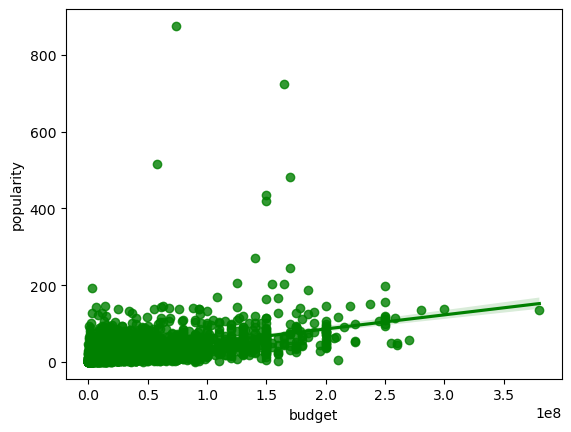

In [15]:
sns.regplot(x=df["budget"],y=df["popularity"],color='Green')

In [16]:
# There is a positive correlation between budget and popularity

# Task-8 : Highest appearanced production company

In [17]:
df['production_companies_names'] = df['production_companies'].apply(fun)

In [18]:
df1 = df.explode('production_companies_names')
production_companies_names = df1.groupby(by=['production_companies_names'])['title'].count()
production_companies_names_sort = production_companies_names.sort_values(ascending=False)

In [19]:
production_companies_names_sort

production_companies_names
Warner Bros.                              297
Universal Pictures                        291
Paramount Pictures                        265
Twentieth Century Fox Film Corporation    209
Columbia Pictures                         182
                                         ... 
Havoc                                       1
Hawthorn Productions                        1
Hawthorne Productions                       1
Haxan Films                                 1
Österreichischer Rundfunk (ORF)             1
Name: title, Length: 4192, dtype: int64

In [20]:
# Warner Bros. has appeared highest among production companies

# Task-9 : Top 25 Production companies by count of movies produced by them

In [21]:
top25_productions = production_companies_names_sort.head(25)
top25_productions

production_companies_names
Warner Bros.                              297
Universal Pictures                        291
Paramount Pictures                        265
Twentieth Century Fox Film Corporation    209
Columbia Pictures                         182
New Line Cinema                           150
Walt Disney Pictures                      105
Metro-Goldwyn-Mayer (MGM)                 104
Relativity Media                          102
Touchstone Pictures                       100
Columbia Pictures Corporation              92
Miramax Films                              80
Village Roadshow Pictures                  75
DreamWorks SKG                             69
United Artists                             66
Regency Enterprises                        62
Canal+                                     58
Dune Entertainment                         56
Fox Searchlight Pictures                   54
TriStar Pictures                           53
Lionsgate                                  52
Summit 

# Task-10 : Top 500 movies sorted by revenue

In [22]:
Top_500_rev = df.sort_values(by='revenue',ascending=False).head(500)
Top_500_rev 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres_list,production_companies_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo..."
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil..."
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[Science Fiction, Action, Adventure]","[Paramount Pictures, Marvel Studios]"
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,[Action],"[Universal Pictures, Original Film, Fuji Telev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://itscomplicatedmovie.com/,22897,"[{""id"": 3687, ""name"": ""graduation""}, {""id"": 59...",en,It's Complicated,"Ten years after their divorce, Jane and Jake A...",16.479851,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,219103655,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,First comes marriage. Then comes divorce. And ...,It's Complicated,6.2,360,"[Comedy, Romance]","[Universal Pictures, Scott Rudin Productions, ..."
1744,30000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://knockedupmovie.com/,4964,"[{""id"": 567, ""name"": ""alcohol""}, {""id"": 2864, ...",en,Knocked Up,"For fun loving party animal Ben Stone, the las...",22.527211,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,219076518,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Save the due date.,Knocked Up,6.2,1214,"[Comedy, Romance, Drama]","[Universal Pictures, Apatow Productions]"
698,70000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, "".

In [23]:
print("Mean of Budgets of movies = ",df["budget"].mean())
print("Median of Budgets of movies = ",df["budget"].median())
print("Mode of Budgets of movies = ",st.mode(df["budget"]))


Mean of Budgets of movies =  37042837.631704725
Median of Budgets of movies =  23000000.0
Mode of Budgets of movies =  20000000


In [24]:
print("Mean of revenue of movies = ",df["revenue"].mean())
print("Median of revenue of movies = ",df["revenue"].median())
print("Mode of revenue of movies = ",st.mode(df["revenue"]))


Mean of revenue of movies =  103954728.88927244
Median of revenue of movies =  38831373.5
Mode of revenue of movies =  0


In [25]:
print("Mean of runtime of movies = ",df["runtime"].mean())
print("Median of runtime of movies = ",df["runtime"].median())
print("Mode of runtime of movies = ",st.mode(df["runtime"]))


Mean of runtime of movies =  109.3210302708444
Median of runtime of movies =  105.0
Mode of runtime of movies =  100.0


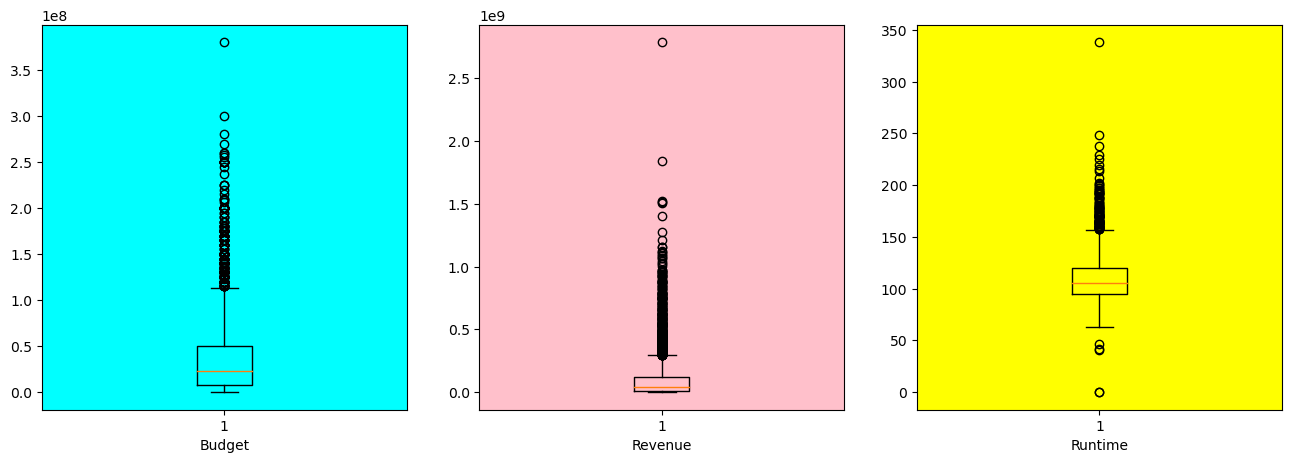

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))

ax1.boxplot(df["budget"])
ax2.boxplot(df["revenue"])
ax3.boxplot(df["runtime"])

ax1.set_xlabel("Budget")
ax2.set_xlabel("Revenue")
ax3.set_xlabel("Runtime")

ax1.set_facecolor("cyan")
ax2.set_facecolor("pink")
ax3.set_facecolor("yellow")

In [27]:
# There are lot of outliers for budget, revenue and runtime and all of them are left skewed

# Task-11 : Movies have runtime greater than average runtime

In [28]:
avg = Top_500_rev['runtime'].mean()
Above_avg_runtime_movies = Top_500_rev[Top_500_rev['runtime']> avg][['title','runtime']]
Above_avg_runtime_movies

,title,runtime
0,Avatar,162.0
25,Titanic,194.0
16,The Avengers,143.0
28,Jurassic World,124.0
44,Furious 7,137.0
...,...,...
521,The Terminal,128.0
397,It's Complicated,121.0
1744,Knocked Up,129.0
717,Jack Reacher,130.0


In [29]:
# 234 movies have runtime greater than average runtime 

# Task-12 : Top 5 popular keywords

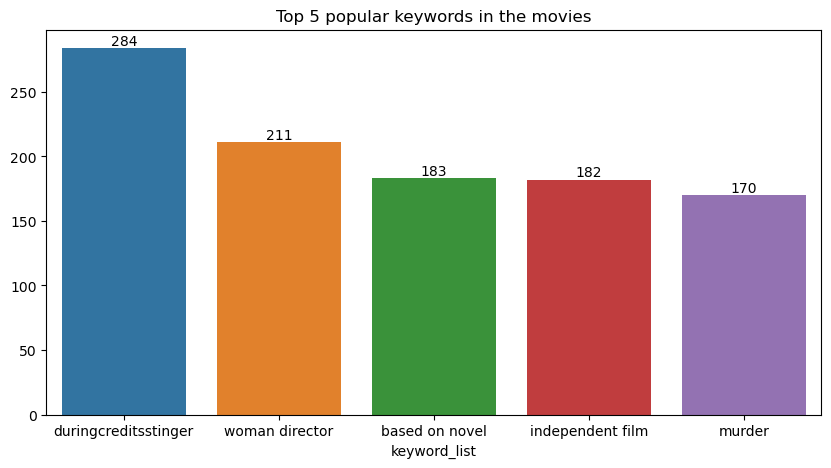

In [43]:
df['keyword_list'] = df['keywords'].apply(fun)
df2 = df.explode('keyword_list')
keyword_list = df2.groupby(by=['keyword_list'])['title'].count()
keyword_list_sort = keyword_list.sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Top 5 popular keywords in the movies")
ax = sns.barplot (x=keyword_list_sort.index,y=keyword_list_sort.values,data=df2)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [31]:
# duringcreditsstinger is the most popular keyword

# Task-13 : Genres of movies of top 10 vote_average

In [44]:
t = df[df['vote_average'] >= 8.3][["title","vote_average","genres_list"]]
t.sort_values(by = "vote_average",ascending=False)


,title,vote_average,genres_list
4247,Me You and Five Bucks,10.0,"[Romance, Comedy, Drama]"
1881,The Shawshank Redemption,8.5,"[Drama, Crime]"
2970,There Goes My Baby,8.5,"[Drama, Comedy]"
3337,The Godfather,8.4,"[Drama, Crime]"
662,Fight Club,8.3,[Drama]
1818,Schindler's List,8.3,"[Drama, History, War]"
2294,Spirited Away,8.3,"[Fantasy, Adventure, Animation, Family]"
2731,The Godfather: Part II,8.3,"[Drama, Crime]"
3232,Pulp Fiction,8.3,"[Thriller, Crime]"
3865,Whiplash,8.3,[Drama]


In [33]:
# Me You and Five Bucks has the best voting(10)

# Task-14 : Relationship between revenue and popularity

<Axes: xlabel='revenue', ylabel='popularity'>

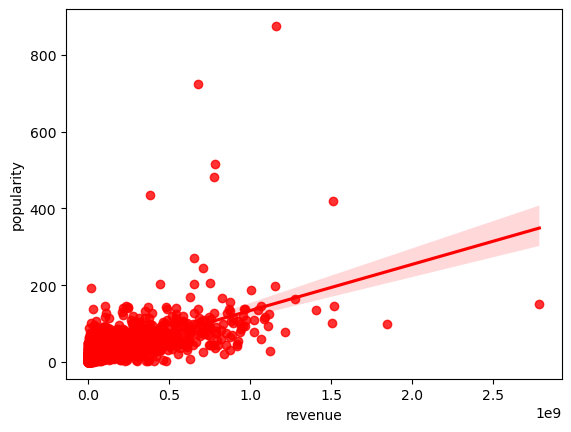

In [45]:
sns.regplot(x=df["revenue"],y=df["popularity"],color='Red')

In [35]:
# Revenue and popularity has a positive Correlation

# Task- 15 : Top 5 Spoken languages in the movies

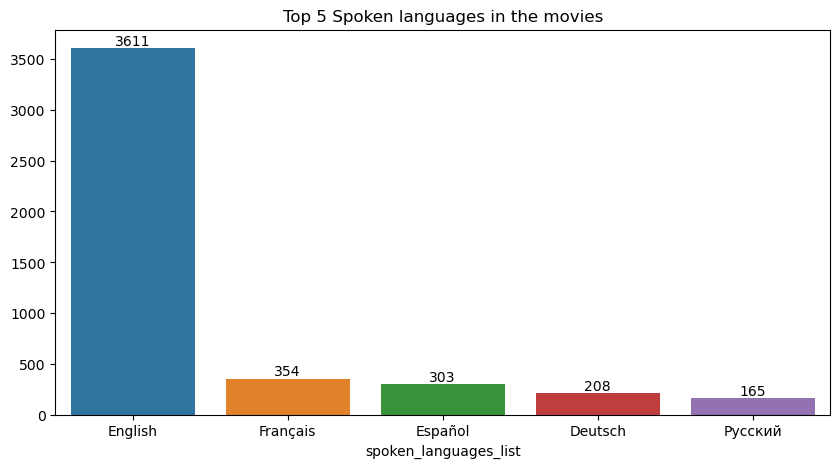

In [41]:
df['spoken_languages_list'] = df['spoken_languages'].apply(fun)
df3 = df.explode('spoken_languages_list')
lang = df3.groupby(by=['spoken_languages_list'])['title'].count()
lang_sort = lang.sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize= (10, 5))
plt.title("Top 5 Spoken languages in the movies")
ax = sns.barplot (x=lang_sort.index,y=lang_sort.values,data=df3)
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(round(bar.get_height()), (x, y), va = "bottom", ha ="center" )

In [ ]:
# Most spoken languages in the films are English